# ARIMA for 0091.KL

## Data Preparation

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf
from pmdarima.arima import ADFTest
from pandas_datareader import data as pdr

In [2]:
def check(x):
    adf = ADFTest()
    print("ADF:",adf.is_stationary(x)[1])

In [3]:
yf.pdr_override()
#load ticker for stock
df = pdr.get_data_yahoo("0091.KL", period="max", end="2020-04-30")
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Change all column headings to be lower case, and remove spacing
df.tail()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2020-03-06,0.005,0.005,0.005,0.005,0.005,0
2020-03-09,0.005,0.005,0.005,0.005,0.005,41431700
2020-03-10,0.005,0.005,0.005,0.005,0.005,1050000
2020-03-11,0.005,0.005,0.005,0.005,0.005,604000
2020-03-12,0.005,0.005,0.005,0.005,0.005,2615600


In [4]:
df = df.filter(items=['adj_close'])
check(df)

ADF: True


C:\Users\Teradon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Teradon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


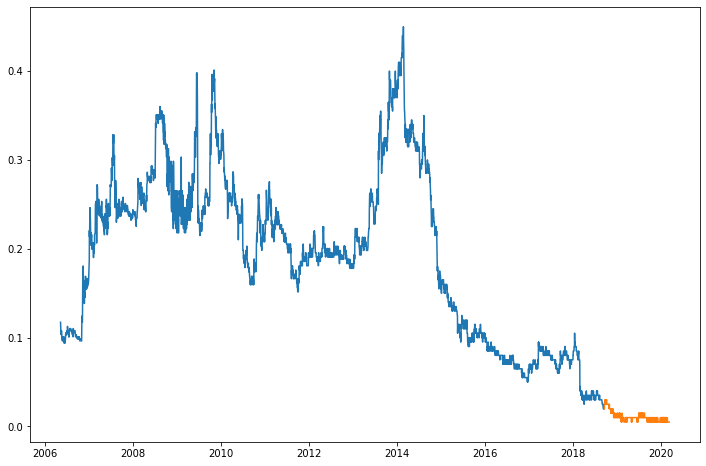

In [5]:
n=366
train = df[:-n]
test = df[-n:]
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.show()

## Training the model

In [6]:
from pmdarima import auto_arima
#auto_arima automatically selects parameters that produce the lowest AIC value
model = auto_arima(train,trace=True,m=7,error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,7) [intercept=True]; AIC=-20374.606, BIC=-20326.486, Time=1.318 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=-20221.529, BIC=-20209.499, Time=0.251 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=-20376.321, BIC=-20352.261, Time=1.235 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=-20373.799, BIC=-20349.739, Time=0.995 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=-20223.487, BIC=-20217.472, Time=0.136 seconds
Fit ARIMA(1,1,0)x(0,0,0,7) [intercept=True]; AIC=-20376.439, BIC=-20358.394, Time=0.393 seconds
Fit ARIMA(1,1,0)x(0,0,1,7) [intercept=True]; AIC=-20376.291, BIC=-20352.231, Time=1.891 seconds
Fit ARIMA(1,1,0)x(1,0,1,7) [intercept=True]; AIC=-20374.311, BIC=-20344.236, Time=2.201 seconds
Fit ARIMA(2,1,0)x(0,0,0,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(1,1,1)x(0,0,0,7) [intercept=True]; AIC=-20374.731, BIC=-20350.671, Time=0.895 seconds
Fit ARIMA(0,

ARIMA(order=(1, 1, 0), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

## Forecasting on the dataset

In [7]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

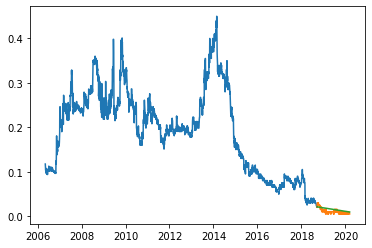

In [8]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

## Evaluating the trained model

In [9]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test,forecast['Prediction']))

3.74948581999268e-05


## Forecasting beyond the dataset

In [10]:
model.update(test)

ARIMA(order=(1, 1, 0), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [11]:
dates = pd.date_range(start='2020-05-01', periods=n)

In [12]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = dates,columns=['Prediction'])

In [15]:
forecast.tail()

,Prediction
2021-04-27,-0.008198
2021-04-28,-0.008234
2021-04-29,-0.008271
2021-04-30,-0.008307
2021-05-01,-0.008344


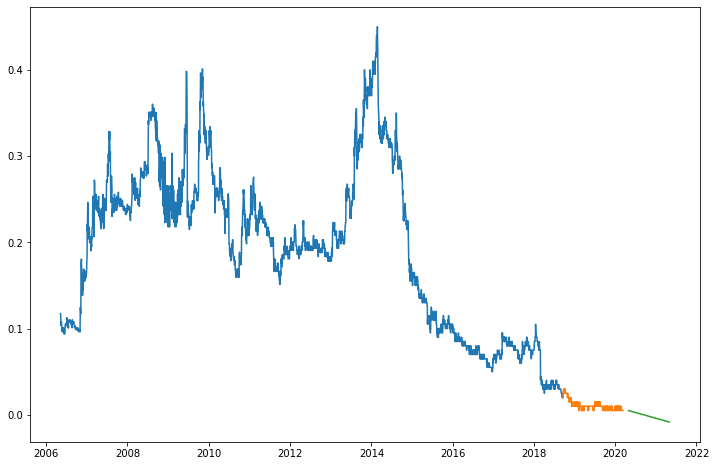

In [13]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Train")
plt.plot(test,label='Test')
plt.plot(forecast,label='Forecast')
plt.show()